In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '${:,.2f}'.format



%matplotlib inline

### Truecaller candidate test

    Canditates : Data Roles
                 0-2y
                 Data Interns, Data Analyst, Associate Data Scientist
    
    Difficulty : (Level 1-3) of Level 5
    
 ``Please try to use functions and classes where-ever possible, be descriptive & efficient with your code, best of luck!``

## Questions S1

### Telecom industry - Q1
Dataset -> `TelecomData_WeeklyData.csv`

CUSTID: Is the unique customer information stored in the system
In our case, it is only 1 customer information

Week: Capture the spending and usage information for each week of the customer duration with the company
We have 6 month or 24 weeks weekly information for the customer

Calls: The number of calls made by the customer each week. It is the frequency of the calls
Minutes: The total minutes spent each week on the calls
    
Amt: The total weekly spending by the customer for the use of telecom service

Q1 - A telecom operator company wishes have some of their most active/spend worthy users rewarded to reduce churn, statistically find these users and graphically plot them based on variables in-order to select the best chunk of users?


Q2 - Who are our customers? Profile them elaborately 


Q3 - The startup has 4 offers running on a daily basis (valid for a day)
		Recharge - 20 for 10 Mins
		Recharge - 30 for 40 Mins
		Recharge - 40 for 80 Mins
		Recharge - 50 for 100 Mins

Their second recharge pack doesn't seem to perform as required, the others fetching ~100 recharges per day in a week on what day would it be advisable for the company to sell these recharges and boost calls made by users

Q4 - An investor wishes to see week,month and yearly metrics, derive maxmimum insights from the data

Q5 - Insight day is here again, provide insights about each user, around (hours,calls,amount etc) etc, provide insights about 5-6 users based on their significant behaviour 

In [2]:
q1 = pd.read_csv('Datasets/TelecomData_WeeklyData.csv')

In [9]:
q1[q1['CustID'].isna()] #Better off removing them, as they provide no value whatsoever

,CustID,Week,Calls,Minutes,Amt
24,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN


In [10]:
q1.dropna(inplace=True)

In [12]:
print(q1.shape)
q1.head()


(21902, 5)


,CustID,Week,Calls,Minutes,Amt
0,1001.0,1.0,56.0,392.0,78.40
1,1001.0,2.0,49.0,735.0,154.35
2,1001.0,3.0,140.0,420.0,126.00
3,1001.0,4.0,182.0,1638.0,393.12
4,1001.0,5.0,70.0,1050.0,294.00


### Q1 - A telecom operator company wishes have some of their most active/spend worthy users rewarded to reduce churn, statistically find these users and graphically plot them based on variables in-order to select the best chunk of users?

In [40]:
#I can only imageine, best chunk of users are the one who spend the most, then the next feature important might be minutes spend (as there can be some 
# advertisement income based on the minutes spent by customer using the telecom services)

impt_cust = q1['Week'].groupby(['CustID'])['Amt', 'Minutes'].sum()
impt_cust.sort_values(by='Amt', ascending = False, inplace=True)
impt_cust.reset_index(inplace=True)

In [46]:
impt_cust.head(5) #As we can see, higher minutes are somewhat related to higer Amt

,CustID,Amt,Minutes
0,1121.0,4167.73,23079.0
1,1076.0,4097.66,20461.0
2,1778.0,3805.83,20594.0
3,1668.0,3719.73,19845.0
4,1114.0,3705.66,19292.0


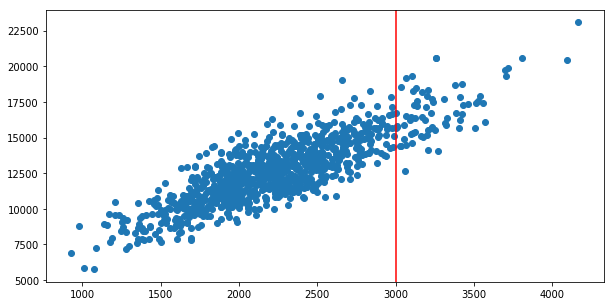

In [55]:
x = impt_cust['Amt'].values
y = impt_cust['Minutes'].values

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.axvline(x=3000, color='red') #I'll say 3000 is a pretty neat cutline, but that will depend on the companies plan

#### Q2 - Who are our customers? Profile them elaborately

### Q3 The startup has 4 offers running on a daily basis (valid for a day) Recharge - 20 for 10 Mins Recharge - 30 for 40 Mins Recharge - 40 for 80 Mins Recharge - 50 for 100 Mins

Their second recharge pack doesn't seem to perform as required, the others fetching ~100 recharges per day in a week on what day would it be advisable for the company to sell these recharges and boost calls made by users

#### Q4 - An investor wishes to see week,month and yearly metrics, derive maxmimum insights from the data

In [56]:
q1.head()

,CustID,Week,Calls,Minutes,Amt
0,1001.0,1.0,56.0,392.0,78.40
1,1001.0,2.0,49.0,735.0,154.35
2,1001.0,3.0,140.0,420.0,126.00
3,1001.0,4.0,182.0,1638.0,393.12
4,1001.0,5.0,70.0,1050.0,294.00


##### Yearly

In [66]:
''' It is difficult to generate yearly metrics, given only 24 weeks of data, still below are weekly, monthly and yearly metrics'''
q1.groupby(['Week'])['Amt', 'Minutes'].sum()

,Amt,Minutes
Week,,
1.0,10621.10,61796.0
2.0,36206.94,196546.0
3.0,63339.92,360318.0
4.0,98058.80,555884.0
5.0,96137.86,549199.0
6.0,98659.61,558964.0
7.0,101236.45,582463.0
8.0,96850.74,551096.0
9.0,97614.30,565670.0


In [73]:
#Month would be roughly 4 weeks of data

data = q1.groupby(['Week'])['Amt', 'Minutes'].sum().reset_index().values



In [92]:
amt=[]
wk = []
curr_sum = 0
curr_wk = 0
for i in range(24):
    curr_sum += data[i][1]
    curr_wk += data[i][2]
    if data[i][0]%4 == 0:
        
        amt.append(curr_sum) #Appending sum of amount and week, every fourth week. Sum of all the amount in that week
        wk.append(curr_wk)
        curr_sum = 0
        curr_wk = 0
        
        

In [99]:
pd.DataFrame(amt).describe()

,0
count,6.000000
mean,371857.558333
std,80591.045666
min,208226.760000
25%,394392.880000
50%,402454.745000
75%,407312.325000
max,417371.990000


In [100]:
pd.DataFrame(wk).describe()

,0
count,6.000000e+00
mean,2.113757e+06
std,4.630148e+05
min,1.174544e+06
25%,2.248827e+06
50%,2.275042e+06
75%,2.315201e+06
max,2.389240e+06


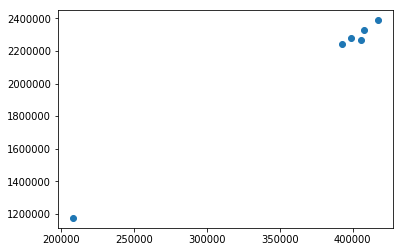

In [95]:
plt.scatter(amt, wk)

##### Weekly

### Brand Preference - Q2
Dataset -> `Brand_Preference.csv`

Q1. Brands (BP -> Brand Perference)

    A -> Elecktra (BP -> 3,5)
    B -> Velzoy (BP -> 1,2)
    C -> DemiCube (BP -> 3,2)
    D -> Harpy (BP -> 3,4)
    E -> 18Again (BP -> 4,5)

Which brand would be the best to on-board considering our target market is already established
with ages below 25 & above 45

Q2. A fellow co-worker would like to plot respondents brand preference based on three categorical levels, where the levels exist as columns, provide the dataset to them in a file format

Q3. What would be the most preffered brand based solely on brand preference

Q4. Regular Expressions

"""`Branding
One of the most critical and basic long-term objectives of marketing is to brand your company or product. This is the use of promotional techniques to create a particular reputation that resonates with target customers. Lexus has developed itself as a luxury and status car brand for people with upper-middle to upper class incomes. Target is a value-oriented retailer of fashion, apparel and home goods. Wal-Mart has built its brand on low prices. Regardless of the image, consumers prefer to purchase products and services that offer a clear value proposition as opposed to ones with uncertainty or mixed messages.`

`Research
Market research is key to increasing brand preferences, as the more you understand about what motivates your customers the easier it is to appeal to them. Getting to know the core beliefs that your products carry into the marketplace is especially useful. For instance, customers who buy high-end fashions generally expect to get a high level of service and to pay a premium price. Understanding this helps you to better tailor your offering to present good benefits and earn reasonable profit.`

`Emphasize Benefits
Turning a habitual or routine buyer into an emotionally attached, loyal customer with a strong brand preference is largely based on the customer's sense of value. Understanding your target market's preferred product or service features and benefits helps you optimize your offering and promote a product concept that meshes with the market's interest. As a premium coffee shop, for instance, your customers may prefer benefits such as taste quality, premium coffee beans, and fast customer service.`

`Engagement
"Engagement" has become a hot buzz word in early 21st century brand development. This is the use of more direct, interactive forms of communication with customers. Personal selling, email and and telemarketing are common, traditional forms of interpersonal communication. Social media, such as Twitter and Facebook, have significantly broadened the concept and importance of brand engagement. Customers move quickly and exchange experiences with others in these real-time social venues. Having a presence in the social media realm helps you directly engage customers and address negative discussions that could impact your brand's word-of-mouth.`"""
 
     1 - Remove all special characters
     
     2 - Find all words with "ing"
     
     3 - Which paragraph has the most vowels
     
     4 - Find the largest word & most repeated word
     
     5 - Find all hyphenated words

**Output for 2,5 must been in a list/array format 

### Weekend Campaign  - Q3
Dataset -> `Weekend_Campaign.xlsx`

The campaign was tested in 24 stores on week end before launching in all stores.
The growth figures(%) are tabulated in the data set.

1.	Is overall growth during campaign month significantly more than 20%? 

2.	Which factors have significant impact on growth? Perform detailed analysis.               

3.  Which regions over a period of time have maximum growth?                     

4.	Present the data graphically


## Questions S2
1. The mean of 10 numbers is 80. One number was wrongly recorded as 2 instead of 12. Find the correct mean.


2. The Pearson’s correlation coefficients (Pearson’s) between X and Y is 1.5.

    a) X and Y are highly correlated 

    b) No correlation between X and Y

    c) Possible calculation error.

                                                                   
3.	Which of the following is a measure of variation?

    a) Median 

    b) Standard Deviation 

    c) Third quartile                     


4.	Explain the difference between “Parametric Test’ and ‘Non Parametric Test’


5. Factor loading Lij is same as variance of Xi (True or False)


6. K means clustering is one of the hierarchical clustering method. (True or False)


7. What may be the effect of ignoring autocorrelation in error terms in linear regression using time series data?


8. Distinguish between time series data and panel data using suitable example.


9. The principal component analysis is performed using correlation matrix of 8 variables. What is the proportion of variance explained by the principal components? what components are to be chosen to plot graphically in 3D?


`PC1 - > 3.07
PC2 - > 1.91
PC3 - > 2.40
PC4 - > 4.11
PC5 - > 0.68
PC6 - > 3.24
PC7 - > 1.35
PC8 - > 0.11`
